In [3]:

print("Task_1")

Task_1


In [4]:
import pandas as pd

# Load the CSV
df = pd.read_csv('Dataset.csv')
df.head()  # show the first few rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()           # See column types and nulls
df.describe()       # Summary stats
df.isnull().sum()   # Missing values check


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

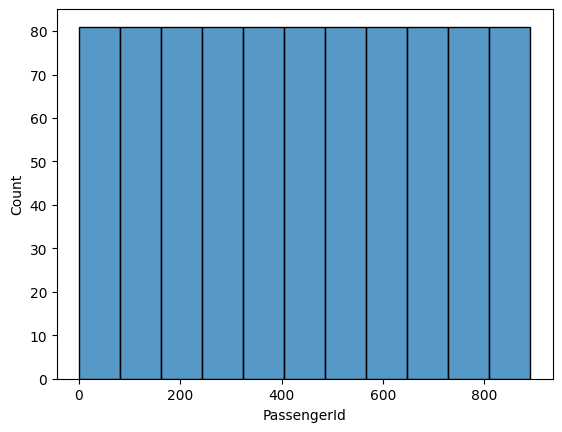

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['PassengerId'])
plt.show()


In [8]:
import pandas as pd

# Load your CSV
df = pd.read_csv('Dataset.csv')

# Explore the data
df.head()         # first 5 rows
df.info()         # column types & nulls
df.describe()     # summary statistics
df.isnull().sum()# check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the column and assign back
df[['PassengerId']] = scaler.fit_transform(df[['PassengerId']]) 

# Check the scaled column's stats
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,6.379733e-17,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,1.000562e+00,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,-1.730108e+00,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,-8.650540e-01,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000e+00,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,8.650540e-01,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.730108e+00,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 1) Drop columns you don't want encoded
df = df.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')

# 2) Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())  # check what we have

# 3) Encode them
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 4) Check the first few rows
df.head()


Categorical columns: ['Sex', 'Embarked']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.730108,0,3,22.0,1,0,7.2500,True,False,True
1,-1.726220,1,1,38.0,1,0,71.2833,False,False,False
2,-1.722332,1,3,26.0,0,0,7.9250,False,False,True
3,-1.718444,1,1,35.0,1,0,53.1000,False,False,True
4,-1.714556,0,3,35.0,0,0,8.0500,True,False,True


In [15]:
# Fill numeric columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())  # or use mean() if you want

# Fill categorical columns with most frequent value (mode)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Check if all missing values are filled
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

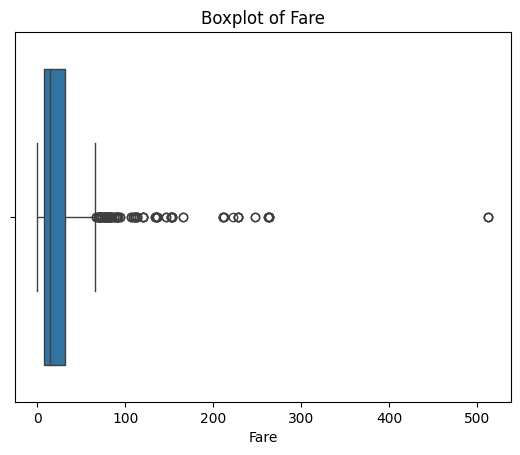

New shape after removing outliers: (775, 10)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a column to check for outliers
col = 'Fare'  # <-- change this to your numeric column name

# Plot boxplot
sns.boxplot(x=df[col])
plt.title(f'Boxplot of {col}')
plt.show()

# Compute Q1, Q3, and IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Filter data to remove extreme outliers
df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

# Check new shape after removal
print("New shape after removing outliers:", df.shape)
